<p style='color:indianred; font-size:180%'>Introduction</p>

This notebook📒 is a <ins>Heart Disease Classification Project</ins>.

It contains **EDA(Exploratory Data Analysis)** mainly using the Pandas Library, **processing/engineering** of the columns,
and **modelling** the data with several classifiers for **Binary Classification** (Yes / No), including the Logistic Regression. Please feel free to offer me constructive feedbacks!

<p style='color:indianred; font-size:160%'>Table of Contents</p>

1. Setup
2. Basic Data Information
3. Column by Column Analysis
4. Heart Disease Distribution for each Column
5. Preparation of the Columns for Modelling
6. Logistic Regression
7. Comparison with other Classifiers (KNN, Random Forest, NN)
8. Streamlit App Deployment

<p style='color:indianred; font-size:180%'>1. Setup</p>

In this section, the libraries used in this project are imported.

In [1]:
import numpy as np

#Data Loading, Manipulation, Analysis and Visualization Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Ordinal Encoder
from category_encoders import OrdinalEncoder

#Modelling Libraries
#(1)Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#(2)Functions for model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

<p style='color:indianred; font-size:180%'>2. Basic Data Information</p>

Loading the Data

In [2]:
data = pd.read_csv('../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')

First five rows of data are shown below.

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
print('number of rows:', data.shape[0])
print('number of columns:', data.shape[1])

number of rows: 319795
number of columns: 18


In [5]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Above is the list of the columns. According to the [dataset page](), the details of each column is given as:
This can be the reference if you wish to look at the meaning of the values later on during the analysis/visualizations.

| Column     | Detail |
| ----------- | ----------- |
| **HeartDisease**      |Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) |
| **BMI**   |Body Mass Index (BMI) |
| **Smoking**  | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]|
| **AlcoholDrinking**  | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)|
| **Stroke**  |(Ever told) (you had) a stroke? |
| **PhysicalHealth**  |Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?|
| **MentalHealth**  |Thinking about your mental health, for how many days during the past 30 days was your mental health not good?  |
| **DiffWalking**  |Do you have serious difficulty walking or climbing stairs? |
| **Sex**  |Are you male or female?  |
| **AgeCategory**  |Fourteen-level age category  |
| **Race**  |Imputed race/ethnicity value  |
| **Diabetic**  |(Ever told) (you had) diabetes?  |
| **PhysicalActivity**  |Adults who reported doing physical activity or exercise during the past 30 days other than their regular job  |
| **GenHealth**  |Would you say that in general your health is...  |
| **SleepTime**  |On average, how many hours of sleep do you get in a 24-hour period?  |
| **Asthma**  |(Ever told) (you had) asthma?  |
| **KidneyDisease**  |Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? |
| **SkinCancer**  |(Ever told) (you had) skin cancer?  |

In [6]:
data.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

There are no missing values in this data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


You may notice that there is an extremely high value of BMI and SleepTime.  
The describe function only shows the 'float64' dtype columns as shown in the info function. The function below will show the rest.

In [9]:
data.describe(include = 'O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


<p style='color:indianred; font-size:180%'>3. Column by Column Analysis</p>

Distribution of each column values will be explored.

#### **Heart Disease**

This is the target column for the classification task.

<AxesSubplot:>

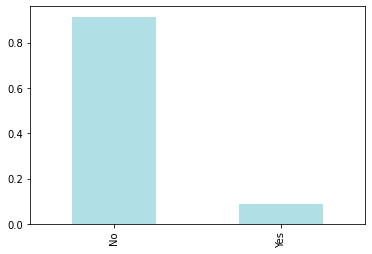

In [10]:
(data['HeartDisease'].value_counts()/data.shape[0]).plot(kind = 'bar', color = 'powderblue')

In [11]:
pd.DataFrame(round((data['HeartDisease'].value_counts()/data.shape[0]*100),2)) #Percentages

,HeartDisease
No,91.44
Yes,8.56


Most people in this dataset are reported to not have had a heart condition (coronary heart disease (CHD) or myocardial infarction (MI) in specific)

#### **BMI**

<AxesSubplot:>

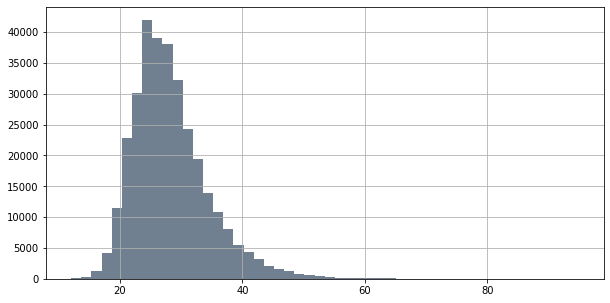

In [12]:
data['BMI'].hist(bins = 50, color = 'slategray', figsize = (10,5))

The distribution of BMI seems somewhat normal, but there seems to be a slight <span style="color:slategray;">right skew</span>.

Using the **'Outlier Formula'**, percentage of outliers (toward the left and right) are computed below.

In [13]:
BMI_75 = data['BMI'].describe()['75%']
BMI_25 = data['BMI'].describe()['25%']
BMI_IQR = BMI_75 - BMI_25

#Outlier Check (%)
print(round(data[data['BMI'] > BMI_75 + 1.5 * BMI_IQR]['BMI'].count()/data.shape[0]*100, 2))
print(round(data[data['BMI'] < BMI_25 - 1.5 * BMI_IQR]['BMI'].count()/data.shape[0]*100, 2))

3.24
0.01


#### **Columns with answers given 'Yes' or 'No'**

In [14]:
Yes_No_Columns = [column for column in data.columns if (len(data[column].value_counts()) == 2)]
Yes_No_Columns.remove('HeartDisease')
Yes_No_Columns.remove('Sex')
print(Yes_No_Columns)
len(Yes_No_Columns)

['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']


8

There are eight columns of this kind (excluding HeartDisease).

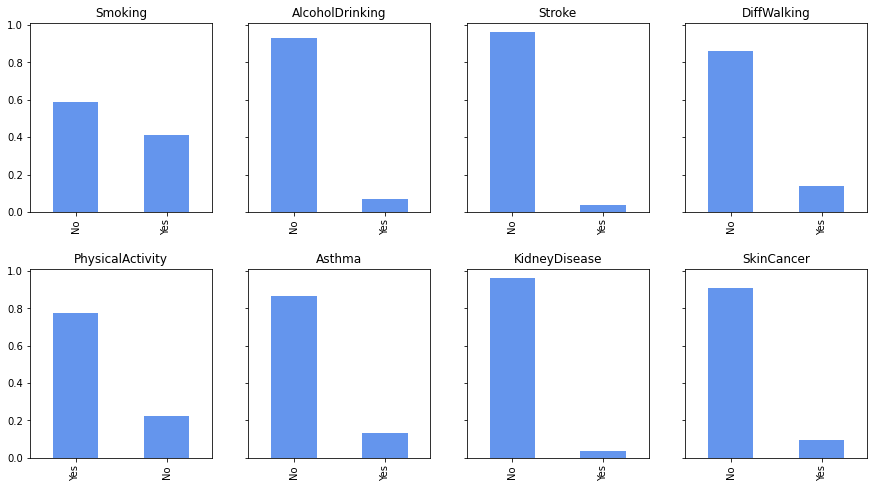

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey = True, figsize = (15,8))
plt.subplots_adjust(hspace = 0.3)

for Column in Yes_No_Columns:
    row_n= int((Yes_No_Columns.index(Column) - Yes_No_Columns.index(Column) % 4)/4)
    column_n = Yes_No_Columns.index(Column) % 4
    (data[Column].value_counts()/data.shape[0]).plot(kind = 'bar', ax = axes[row_n,column_n], title = Column, color = 'cornflowerblue')

For each of the plot above, we can see the proportions/distribution of Yes/No results to the related questions.

#### **PhysicalHealth and MentalHealth**

<AxesSubplot:>

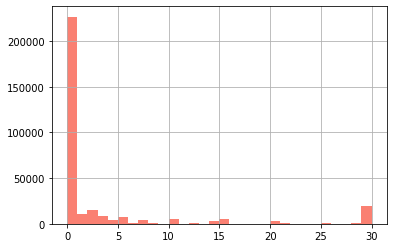

In [16]:
data['PhysicalHealth'].hist(bins = 30, color = 'salmon')

<AxesSubplot:>

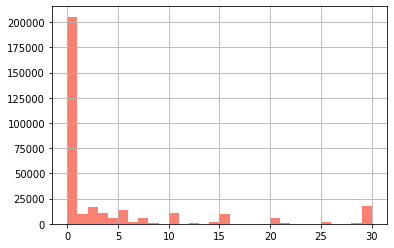

In [17]:
data['MentalHealth'].hist(bins = 30, color = 'salmon')

For both Physical Health and Mental health, we can see a heavy right skew. It also seems that most people answered '0 days' for both, which sounds like they are 'normal'. But compared to other answers like '8 days' or '15 days', many people (in comparison to other answers within the 1-30 range) answered '30 days', which basically sounds like they don't feel good every day.

#### **Sex**

<AxesSubplot:>

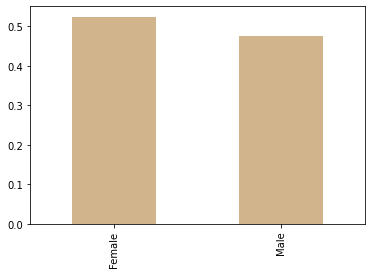

In [18]:
(data['Sex'].value_counts()/data.shape[0]).plot(kind = 'bar', color = 'tan')

Gender distribution seems to be fairly even.

#### **AgeCategory, Race, Diabetic and GenHealth**

In [19]:
pd.DataFrame(data['AgeCategory'].value_counts()).style.bar(color='thistle')

,AgeCategory
65-69,34151
60-64,33686
70-74,31065
55-59,29757
50-54,25382
80 or older,24153
45-49,21791
75-79,21482
18-24,21064
40-44,21006


In [20]:
pd.DataFrame(data['Race'].value_counts()).style.bar(color='navajowhite')

,Race
White,245212
Hispanic,27446
Black,22939
Other,10928
Asian,8068
American Indian/Alaskan Native,5202


In [21]:
pd.DataFrame(data['Diabetic'].value_counts()).style.bar(color = 'thistle')

,Diabetic
No,269653
Yes,40802
"No, borderline diabetes",6781
Yes (during pregnancy),2559


In [22]:
pd.DataFrame(data['GenHealth'].value_counts()).style.bar(color='navajowhite')

,GenHealth
Very good,113858
Good,93129
Excellent,66842
Fair,34677
Poor,11289


#### **SleepTime**

<AxesSubplot:>

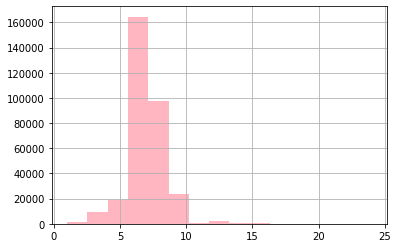

In [23]:
data['SleepTime'].hist(bins = 15, color = 'lightpink')

Table Visualization of the same column is shown below (SleepTime)

In [24]:
pd.DataFrame(data['SleepTime'].value_counts().sort_index()).style.bar(color='lightpink')

,SleepTime
1.0,551
2.0,788
3.0,1992
4.0,7750
5.0,19184
6.0,66721
7.0,97751
8.0,97602
9.0,16041
10.0,7796


In [25]:
round(100 * (data['SleepTime'] > 12).sum()/data.shape[0], 2) #Percentage of people with 12 hours of sleep.

0.31

There are small proportions with over 12 hours of sleep (about 0.3% in total)

#### **Correlation Matrix**

We only have 4 numerical columns out of 18 columns, so the correlation matrix is made as the following:

In [26]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<AxesSubplot:>

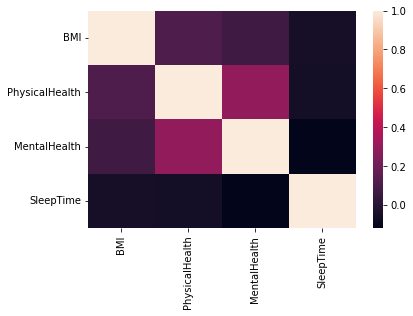

In [27]:
sns.heatmap(data.corr())

<p style='color:indianred; font-size:180%'>4. Heart Disease Distribution for each Column</p>

In the following, **Heart Disease Distribution** for <ins>each of the other columns</ins> is shown.

Since the HeartDisease columns are given as 'Yes' or 'No' values, the following code will change them into numerics (Yes: 1, No: 0)

In [28]:
data['HeartDisease'] = 1 * (data['HeartDisease'] == 'Yes')
pd.DataFrame(data['HeartDisease'].head(5))

,HeartDisease
0,0
1,0
2,0
3,0
4,0


#### **Yes or No Columns**

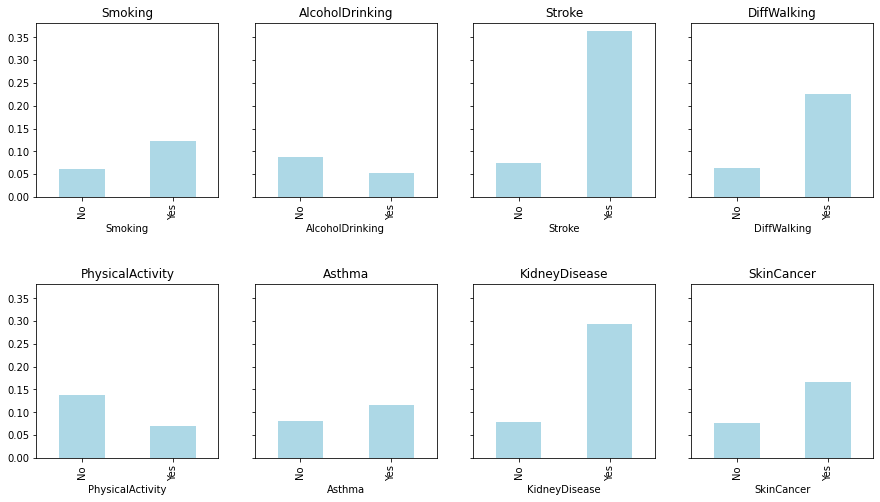

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey = True, figsize = (15,8))
plt.subplots_adjust(hspace = 0.5)

for Column in Yes_No_Columns:
    row_n= int((Yes_No_Columns.index(Column) - Yes_No_Columns.index(Column) % 4)/4)
    column_n = Yes_No_Columns.index(Column) % 4
    data.groupby(Column)['HeartDisease'].mean().plot(kind = 'bar', ax = axes[row_n,column_n], title = Column, color = 'lightblue')

Above is the Heart Disease (Yes) Proportion for each of the Yes/No for each Yes or No Columns mentioned earlier.

#### **Sex, AgeCategory, Race, Diabetic, GenHealth**

<AxesSubplot:xlabel='Sex'>

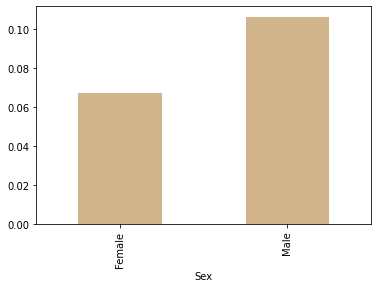

In [30]:
data.groupby('Sex')['HeartDisease'].mean().plot(kind = 'bar', color = 'tan')

Higher proportion with males.

<AxesSubplot:xlabel='AgeCategory'>

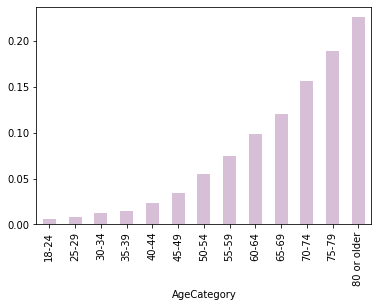

In [31]:
data.groupby('AgeCategory')['HeartDisease'].mean().plot(kind = 'bar', color = 'thistle')

Higher proportions with higher Age Category.

<AxesSubplot:xlabel='Race'>

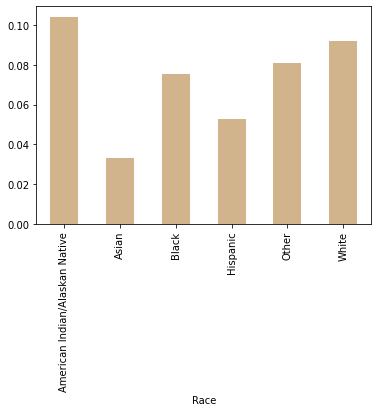

In [32]:
data.groupby('Race')['HeartDisease'].mean().plot(kind = 'bar', color = 'tan')

Lowest Proportion with 'Asian' and Highest with 'American Indian/Alaskan Native'.

<AxesSubplot:xlabel='Diabetic'>

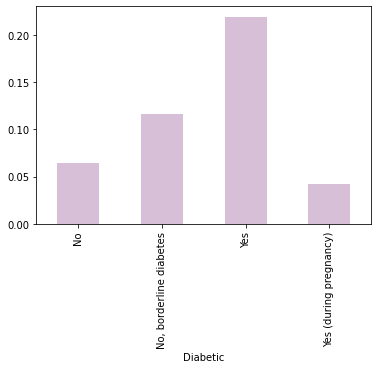

In [33]:
data.groupby('Diabetic')['HeartDisease'].mean().plot(kind = 'bar', color = 'thistle')

<AxesSubplot:xlabel='GenHealth'>

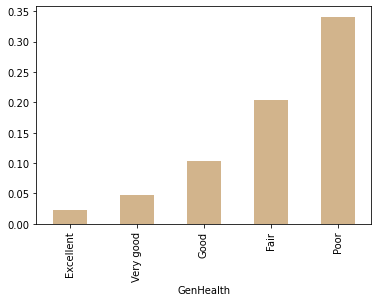

In [34]:
data.groupby('GenHealth')['HeartDisease'].mean().sort_values().plot(kind = 'bar', color = 'tan')

#### **BMI**

https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html
shows the following table of BMI Interpretations:

In [35]:
pd.DataFrame(data = {'Weight Status' :['Underweight', 'Healthy Weight', 'Overweight', 'Obsesity']}, index = ['Below 18.5', '18.5-24.9', '25.0-29.9', '30.0 and Above'])

,Weight Status
Below 18.5,Underweight
18.5-24.9,Healthy Weight
25.0-29.9,Overweight
30.0 and Above,Obsesity


Heart Disease Distribution according to the above table yields the following result:

<AxesSubplot:xlabel='BMI_1'>

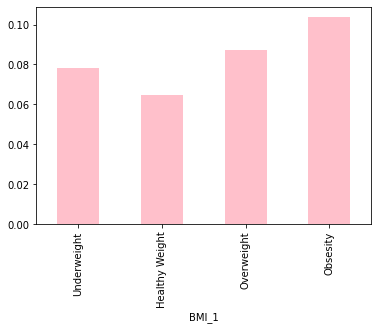

In [36]:
data['BMI_1'] = pd.cut(data['BMI'], [0,18.5,25.0,30.0,100], labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obsesity'], right = False)
data.groupby('BMI_1')['HeartDisease'].mean().plot(kind = 'bar', color = 'pink')

The BMI values in the data range upto about 90.   
I divided the Obesity Category further by the BMI Values, adding **two more** (dividing at **40 and 50**).

<AxesSubplot:xlabel='BMI_2'>

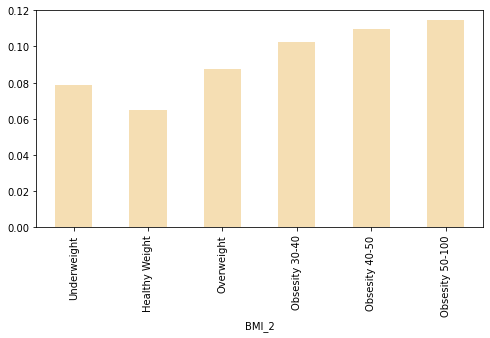

In [37]:
data['BMI_2'] = pd.cut(data['BMI'], [0,18.5,25.0,30.0,40,50,100], labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obsesity 30-40', 'Obsesity 40-50', 'Obsesity 50-100'], right = False)
data.groupby('BMI_2')['HeartDisease'].mean().plot(kind = 'bar', color = 'wheat', figsize = (8,4))

#### **PhysicalHealth and MentalHealth**

For PhysicalHealth and MentalHealth, I binned them roughly by 10s, but I divided them in a way that those who answered '0' or '30' days would have separate categories of their own.

<AxesSubplot:xlabel='PhysicalHealth_2'>

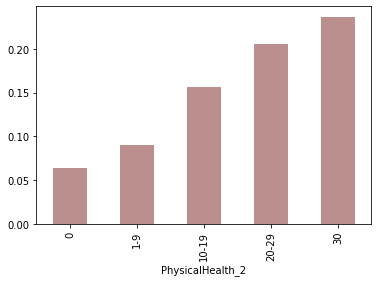

In [38]:
data['PhysicalHealth_2'] = pd.cut(data['PhysicalHealth'], [0,1,10,20,30,31], labels = ['0','1-9','10-19','20-29','30'], right = False)
data.groupby('PhysicalHealth_2')['HeartDisease'].mean().plot(kind = 'bar', color = 'rosybrown')

<AxesSubplot:xlabel='MentalHealth_2'>

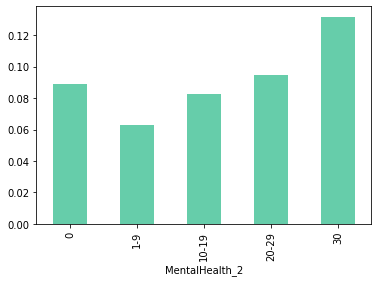

In [39]:
data['MentalHealth_2'] = pd.cut(data['MentalHealth'], [0,1,10,20,30,31],labels = ['0','1-9','10-19','20-29','30'], right = False)
data.groupby('MentalHealth_2')['HeartDisease'].mean().plot(kind = 'bar', color = 'mediumaquamarine')

https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html

The above link says that the recommended hours of sleep for adults is  
7 or more (18-60 years)  
7-9 hours (61-64 years)  
7-8 hours (65 years and older)

Following is the categorization/binning of the sleep hours and what the mean value of HeartDisease is for each.

<AxesSubplot:xlabel='SleepTime_2'>

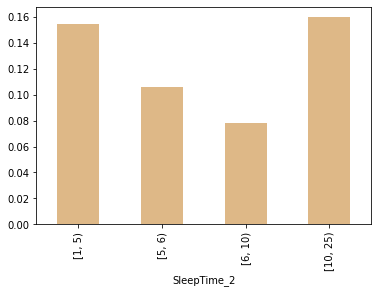

In [40]:
data['SleepTime_2'] = pd.cut(data['SleepTime'], [1,5,6,10,25], right = False)
data.groupby('SleepTime_2')['HeartDisease'].mean().plot(kind = 'bar', color = 'burlywood')

<p style='color:indianred; font-size:180%'>5. Preparation of the Columns for Modelling</p>

In order for the columns to be used for modelling, the columns will be 'prepared' (transformed➡️ to numeric values)

Currently, the data table looks like the following:

In [41]:
data.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_1,BMI_2,PhysicalHealth_2,MentalHealth_2,SleepTime_2
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Very good,5.0,Yes,No,Yes,Underweight,Underweight,1-9,30,"[5, 6)"
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,Very good,7.0,No,No,No,Healthy Weight,Healthy Weight,0,0,"[6, 10)"
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Fair,8.0,Yes,No,No,Overweight,Overweight,20-29,30,"[6, 10)"


#### **Sex and Yes or No Columns (Binary Categorical Columns)** 

In [42]:
for Column in Yes_No_Columns:
    data[Column] = 1 * (data[Column] == 'Yes')

data['Sex'] = 1 * (data['Sex'] == 'Male')

#### **Ordinal Categorical Columns**

In [43]:
data['BMI'] = pd.cut(data['BMI'], [0,18.5,25.0,30.0,40,50,100], labels = [0,1,2,3,4,5], right = False)

data['PhysicalHealth'] = pd.cut(data['PhysicalHealth'], [0,1,10,20,30,31],labels = [0,1,2,3,4], right = False)

data['MentalHealth'] = pd.cut(data['MentalHealth'], [0,1,10,20,30,31],labels = [0,1,2,3,4], right = False)

data['SleepTime'] = pd.cut(data['SleepTime'], [1,5,6,10,25], labels =[0,1,2,3] , right = False)

data = data.drop(['PhysicalHealth_2','MentalHealth_2','SleepTime_2','BMI_1','BMI_2'], axis = 1)

mapping_1 = {}

for category in sorted(list(data['AgeCategory'].unique())):
    mapping_1[category] = sorted(list(data['AgeCategory'].unique())).index(category)

maplist_1 = [{'col': 'AgeCategory', 
            'mapping': mapping_1}]

Ordinal_Encoder_1 = OrdinalEncoder(mapping=maplist_1)

data = Ordinal_Encoder_1.fit_transform(data)

maplist_2 = [{'col': 'GenHealth', 
            'mapping': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}}]

Ordinal_Encoder_2 = OrdinalEncoder(mapping=maplist_2)

data = Ordinal_Encoder_2.fit_transform(data)

<span style='color:indianred; font-size:120%'>One </span><span style='color:blue; font-size:120%'>Hot </span><span style='color:green; font-size:120%'>Encoding</span>

In [44]:
for Race in data['Race'].unique():
    data[Race] = 1 * (data['Race'] == Race)

for Diabetic in data['Diabetic'].unique():
    data[Diabetic] = 1 * (data['Diabetic'] == Diabetic)   
    
data = data.drop(['Race','Diabetic'], axis = 1)

Below is the result of the column preparations:

In [45]:
data.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic,Yes,No,"No, borderline diabetes",Yes (during pregnancy)
0,0,0,1,0,0,1,4,0,0,7,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,12,...,1,0,0,0,0,0,0,1,0,0
2,0,2,1,0,0,3,4,0,1,9,...,1,0,0,0,0,0,1,0,0,0


<p style='color:indianred; font-size:180%'>6. Logistic Regression</p>

Train Test Split is conducted below. 'Stratify' option is used, and this maintains the Heart Disease proportions roughly equal in both train and test sets.

In [46]:
X = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20, stratify = y)

print(y_train.mean())
print(y_test.mean())

0.08559665062627035
0.08558474046278924


Lists below will be used in comparing the classifiers later.

In [47]:
execution_time_fit = []
execution_time_predict = []

#### **Logistic Regression**

In [48]:
Classifier_1 = LogisticRegression(max_iter = 300)

Classifier_1.fit(X_train, y_train)

Predictions_1 = Classifier_1.predict(X_test)

#### **Confusion Matrix**

Below is the confusion matrix for this model.

✏️**Accuracy** Score means 'How much(proportion) of the true labels did I get right?'  
✏️**Precision** Score: 'Out of the 1s that I predicted, how much did I get right?'  
✏️**Recall** Score: 'Out of 1s in the Test Set, how much did I get right?'

We would want high score for all of them.

Accuracy Score:  0.9150093808630394
Precision Score:  0.5164644714038128
Recall Score:  0.10887833394227256


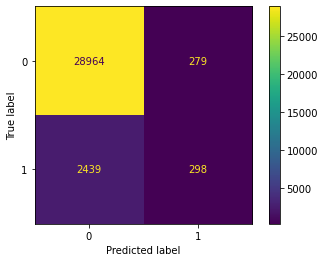

In [49]:
Confusion = confusion_matrix(y_test, Predictions_1)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_1))
print('Precision Score: ', precision_score(y_test, Predictions_1))
print('Recall Score: ', recall_score(y_test, Predictions_1))

#### **Undersampling** ⬇️

The classes (of HeartDisease) are distributed as the following in the train set:

In [50]:
pd.DataFrame(y_train.value_counts())

,HeartDisease
0,263179
1,24636


proportion 0 is more than ten times of 1.
This time, we will use an undersampled ⬇️ version of the train set, where the classes are equally balanced.

In [51]:
Under = X_train.copy()
Under['HeartDisease'] = y_train
Under_0 = Under[Under['HeartDisease'] == 0].copy()
Under_1 = Under[Under['HeartDisease'] == 1].copy()

Under_Sample = pd.concat([Under_1, Under_0.sample(frac = len(Under_1)/len(Under_0))])

pd.DataFrame(Under_Sample['HeartDisease'].value_counts())

,HeartDisease
1,24636
0,24636


Accuracy Score:  0.7560350218886804
Precision Score:  0.22894145349459488
Recall Score:  0.7815126050420168


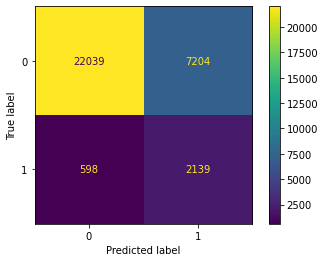

In [52]:
Classifier_1_Under = LogisticRegression(max_iter = 300)

time_1_fit_start = time.time()

Classifier_1_Under.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_1_fit_end = time.time()
time_1_fit = time_1_fit_end - time_1_fit_start
execution_time_fit.append(time_1_fit)

time_1_predict_start = time.time()

Predictions_1_Under = Classifier_1_Under.predict(X_test)

time_1_predict_end = time.time()
time_1_predict = time_1_predict_end - time_1_predict_start
execution_time_predict.append(time_1_predict)

Confusion_Under = confusion_matrix(y_test, Predictions_1_Under)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_Under)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_1_Under))
print('Precision Score: ', precision_score(y_test, Predictions_1_Under))
print('Recall Score: ', recall_score(y_test, Predictions_1_Under))

We can observe that the Logistic Regression Classifier that used Undersampled Train Test:  
⬇decreased in terms of Accuracy and precision,  
but ⬆⬆increased alot in terms of Recall Score. (about times 7)

<p style='color:indianred; font-size:180%'>7. Comparison with other Classifiers (KNN, Random Forest, NN)</p>

Three other classifers will be used with the undersampled train set:

##### **📌 K Nearest Neighbors Classifier**
##### **📌 Random Forest Classifier**
##### **📌 Multi-layer Perceptron (MLP) Classifier**

#### **K Nearest Neighbors Classifier**

Accuracy Score:  0.7254846779237023
Precision Score:  0.20005957108816522
Recall Score:  0.7362075264888565


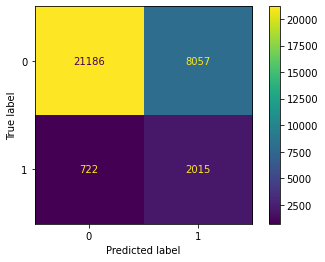

In [53]:
Classifier_2 = KNeighborsClassifier(n_neighbors=5)

time_2_fit_start = time.time()

Classifier_2.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_2_fit_end = time.time()
time_2_fit = time_2_fit_end - time_2_fit_start
execution_time_fit.append(time_2_fit)

time_2_predict_start = time.time()

Predictions_2 = Classifier_2.predict(X_test)

time_2_predict_end = time.time()
time_2_predict = time_2_predict_end - time_2_predict_start
execution_time_predict.append(time_2_predict)

Confusion_2 = confusion_matrix(y_test, Predictions_2)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_2)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_2))
print('Precision Score: ', precision_score(y_test, Predictions_2))
print('Recall Score: ', recall_score(y_test, Predictions_2))

#### **Random Forest Classifier**

Accuracy Score:  0.7154158849280801
Precision Score:  0.1976434815659445
Recall Score:  0.7599561563755937


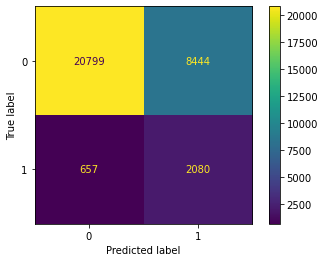

In [54]:
Classifier_3 = RandomForestClassifier(n_estimators=25)

time_3_fit_start = time.time()

Classifier_3.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_3_fit_end = time.time()
time_3_fit = time_3_fit_end - time_3_fit_start
execution_time_fit.append(time_3_fit)

time_3_predict_start = time.time()

Predictions_3 = Classifier_3.predict(X_test)

time_3_predict_end = time.time()
time_3_predict = time_3_predict_end - time_3_predict_start
execution_time_predict.append(time_3_predict)

Confusion_3 = confusion_matrix(y_test, Predictions_3)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_3)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_3))
print('Precision Score: ', precision_score(y_test, Predictions_3))
print('Recall Score: ', recall_score(y_test, Predictions_3))

#### **MLP Classifier**

Accuracy Score:  0.7454659161976235
Precision Score:  0.22374475917783004
Recall Score:  0.7994154183412495


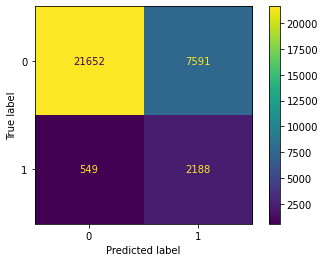

In [55]:
Classifier_4 = MLPClassifier(hidden_layer_sizes=(5, 2))

time_4_fit_start = time.time()

Classifier_4.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_4_fit_end = time.time()
time_4_fit = time_4_fit_end - time_4_fit_start
execution_time_fit.append(time_4_fit)

time_4_predict_start = time.time()

Predictions_4 = Classifier_4.predict(X_test)

time_4_predict_end = time.time()
time_4_predict = time_4_predict_end - time_4_predict_start
execution_time_predict.append(time_4_predict)

Confusion_4 = confusion_matrix(y_test, Predictions_4)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_4)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_4))
print('Precision Score: ', precision_score(y_test, Predictions_4))
print('Recall Score: ', recall_score(y_test, Predictions_4))

#### **Comparison of the four Classifiers ✅❎🕑**

#### ROC(Receiver Operating Characteristic) Curves📉

[Source](https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python) for the ROC Curve Code

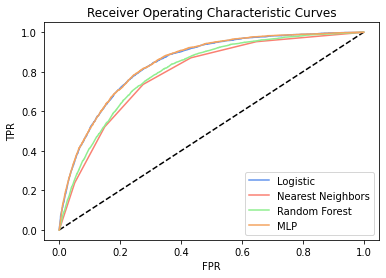

In [56]:
y_pred_prob1 = Classifier_1_Under.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = Classifier_2.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = Classifier_3.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = Classifier_4.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic", color = 'cornflowerblue')
plt.plot(fpr2, tpr2, label= "Nearest Neighbors", color = 'salmon')
plt.plot(fpr3, tpr3, label= "Random Forest", color = 'lightgreen')
plt.plot(fpr4, tpr4, label= "MLP", color = 'sandybrown')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic Curves')
plt.show()

#### Running Time

In [57]:
Times = pd.DataFrame({'Classifier': ['Logistic','Nearest Neighbors','Random Forest','MLP'], 'fit execution time': execution_time_fit, 'predict execution time' : execution_time_predict })

Times.style.bar(color = 'rosybrown')

,Classifier,fit execution time,predict execution time
0,Logistic,1.731294,0.009625
1,Nearest Neighbors,0.010309,33.916067
2,Random Forest,1.108233,0.251755
3,MLP,12.874497,0.013442


<p style='color:indianred; font-size:180%'>8. Streamlit App Deployment</p>

Lastly, the Logistic Regression Classifier (Used with Undersampling Method) can be deployed as a **Streamlit App**. For this app, I will be only using the following columns: **BMI, AgeCategory, Sex, DiffWalking, SleepTime, and Stroke.**

Following output shows the model performance with only these columns:

Accuracy Score:  0.7195434646654159
Precision Score:  0.1978863680434361
Recall Score:  0.7457069784435514


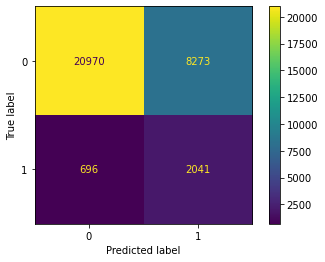

In [58]:
Streamlit = ['BMI','AgeCategory','Sex','DiffWalking','SleepTime','Stroke']

Classifier_Streamlit = LogisticRegression(max_iter = 300)

Classifier_Streamlit.fit(Under_Sample[Streamlit], Under_Sample['HeartDisease'])

Predictions_Streamlit = Classifier_Streamlit.predict(X_test[Streamlit])

Confusion_Streamlit = confusion_matrix(y_test, Predictions_Streamlit)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_Streamlit)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_Streamlit))
print('Precision Score: ', precision_score(y_test, Predictions_Streamlit))
print('Recall Score: ', recall_score(y_test, Predictions_Streamlit))

The above model has been deployed as a simple app at this [link](https://share.streamlit.io/jinsol-kwon/streamlit-app/main/Streamlit.py).

<p style='color:indianred; font-size:180%'>Closing</p>

What did you think about this notebook?📙

Please don't hesitate to offer me feedbacks/corrections/advices! Thank you for reading!